In [1]:
from pprint import pprint
import time
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from config import api_key
import scipy.stats as st
import csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import math
import json

# South Korea Stock Data

In [2]:
#Set current time and stock ticker to query
curr_time = int(time.time())
#prior_year = curr_time-(60*60*24*365)
prior_year = 1543622400  # unix for December 01,2018
ticker_symbol = "^KS11"

In [3]:
#Yahoo finance API query
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': api_key
    }

responseKS11 = requests.request("GET", url, headers=headers, params=querystring)


C:\Users\nateb\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


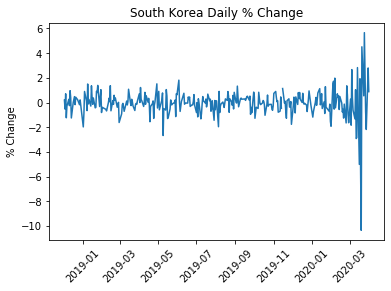

In [4]:
#Create table of data from API. Take JSON data, make a dictionary and then format into dataframe
timestamp = responseKS11.json()['chart']['result'][0]['timestamp']
year_close = responseKS11.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =responseKS11.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =responseKS11.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =responseKS11.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

    
KS11_Dict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
KS11_df = pd.DataFrame(KS11_Dict)

#Calculate daily change %
KS11_df['Change %'] = ((KS11_df['Close']-KS11_df['Open'])/KS11_df['Open'])*100

#convert date to datetime
convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(KS11_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(KS11_df['Timestamp']))]
KS11_df['Date'] = convert_date

#Establish LY to do any year over year comparisons
KS11_df['Last Year'] =[datetime.datetime.strptime(KS11_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(KS11_df['Date']))]
KS11_df['Date']=pd.to_datetime(KS11_df['Date'],errors='coerce')

KS11_df2=KS11_df.sort_values(by='Date',ascending=False)
KS11_df2=KS11_df.head(59)

#Plot Daily Change %
plt.plot(KS11_df['Date'],KS11_df['Change %'])
plt.xticks(rotation=45)
plt.title("South Korea Daily % Change")
plt.ylabel("% Change")
plt.show()

# DJI Index

In [5]:
#Set current date and run Yahoo finance API
curr_time = int(time.time())
ticker_symbol = "^DJI"
prior_year=1543622400
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': api_key
    }

response_DJI = requests.request("GET", url, headers=headers, params=querystring)

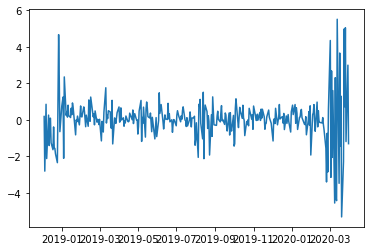

In [6]:
#Create table of data from API. Take JSON data, make a dictionary and then format into dataframe
timestamp = response_DJI.json()['chart']['result'][0]['timestamp']
year_close = response_DJI.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response_DJI.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response_DJI.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response_DJI.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

dji_Dict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
dji_df = pd.DataFrame(dji_Dict)

#Calculate daily change %
dji_df['Change %'] = ((dji_df['Close']-dji_df['Open'])/dji_df['Open'])*100

#convert date to datetime
convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(dji_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(dji_df['Timestamp']))]
dji_df['Date'] = convert_date

#Establish LY to do any year over year comparisons
dji_df['Last Year'] =[datetime.datetime.strptime(dji_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(dji_df['Date']))]
dji_df['Date']=pd.to_datetime(dji_df['Date'],errors='coerce')

#Plot daily change %
plt.plot(dji_df['Date'],dji_df['Change %'])
plt.show()
# dji_df.dtypes

# S&P 500 Index

In [7]:
#Set current date and run Yahoo finance API
curr_time = int(time.time())
#prior_year = curr_time-(60*60*24*365)
prior_year=1543622400
ticker_symbol = "^GSPC"


url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': api_key
    }

responsesnp = requests.request("GET", url, headers=headers, params=querystring)

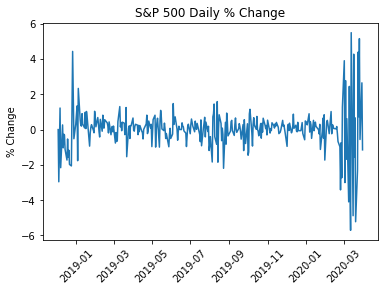

In [8]:
#Create table of data from API. Take JSON data, make a dictionary and then format into dataframe
timestamp = responsesnp.json()['chart']['result'][0]['timestamp']
year_close = responsesnp.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =responsesnp.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =responsesnp.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =responsesnp.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

    
snpDict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
snp_df = pd.DataFrame(snpDict)

#Calculate daily change %
snp_df['Change %'] = ((snp_df['Close']-snp_df['Open'])/snp_df['Open'])*100

#convert date to datetime
convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(snp_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(snp_df['Timestamp']))]
snp_df['Date'] = convert_date

#Establish LY for year over year comparisons
snp_df['Last Year'] =[datetime.datetime.strptime(snp_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(snp_df['Date']))]
snp_df['Date']=pd.to_datetime(snp_df['Date'],errors='coerce')

# snp_df.tail()
#Plot daily change %
plt.plot(snp_df['Date'],snp_df['Change %'])
plt.xticks(rotation=45)
plt.title("S&P 500 Daily % Change")
plt.ylabel("% Change")
plt.show()

# Italy Index

In [9]:
#Import FTSE data from CSV file (orig source: investing.com) adn store as dataframe
italy_df=pd.read_csv("italy_index/FTSE Italia All Share Historical Data.csv")
italy_df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Timestamp
0,2020-3-20,17171.55,17209.93,17628.87,17047.73,1500000000,1.85,1584662400
1,2020-3-19,16859.82,16814.38,17240.13,16438.49,1270000000,2.27,1584576000
2,2020-3-18,16486.21,16372.27,16785.57,16149.48,992760000,-1.17,1584489600
3,2020-3-17,16680.56,16850.34,17238.59,16065.72,1400000000,1.96,1584403200
4,2020-3-16,16360.04,17130.96,17130.96,15498.19,1540000000,-6.06,1584316800


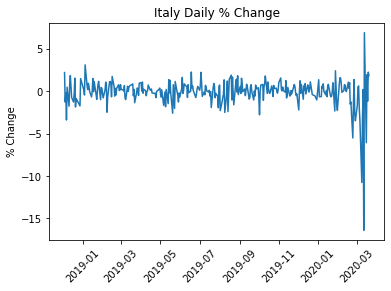

In [10]:
#covert Date field into datetime
italy_df['Date']=pd.to_datetime(italy_df['Date'],errors='coerce')

#plot daily change %
plt.plot(italy_df['Date'],italy_df['Change %'])
plt.xticks(rotation=45)
plt.title("Italy Daily % Change")
plt.ylabel("% Change")
plt.show()

# COVID DATA

In [11]:
#Import COVID19 data from data source file and read CSVs into dataframe
time_series_2019_ncov_Deaths =pd.read_csv("COVID19_data/time_series_2019-ncov-Deaths.csv")
time_series_2019_ncov_Recovered = pd.read_csv("COVID19_data/time_series_2019-ncov-Recovered.csv")
time_series_2019_ncov_Confirmed = pd.read_csv("COVID19_data/time_series_2019-ncov-Confirmed.csv")
time_series_ncov_Recovered = pd.read_csv("COVID19_data/time_series-ncov-Recovered.csv")
time_series_ncov_Confirmed = pd.read_csv("COVID19_data/time_series-ncov-Confirmed.csv")
time_series_ncov_Deaths = pd.read_csv("COVID19_data/time_series-ncov-Deaths.csv")

# Italy Confirmed Cases

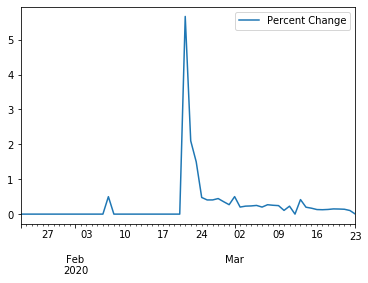

In [12]:
#Filter dataframes for country Italy
Italy_cond=time_series_2019_ncov_Confirmed['Country/Region']=='Italy'

Italy_confirmed = time_series_2019_ncov_Confirmed[Italy_cond]
Italy_confirmed =Italy_confirmed.drop(columns =['Lat','Long','Province/State'])
Italy_confirmed = Italy_confirmed.groupby('Country/Region').sum()

#Transpose dataframe
Italy_confirmed =Italy_confirmed.T
Italy_confirmed.index = pd.to_datetime(Italy_confirmed.index)
#china_confirmed.plot(legend=False)

#Calculate the daily change % in confirmed cases
Italy_daily = [0]
Italy_daily_percent = [0]
for i in range(1,len(Italy_confirmed['Italy'])):
    Italy_daily.append(Italy_confirmed['Italy'][i]-Italy_confirmed['Italy'][i-1])
    if Italy_confirmed['Italy'][i-1]>0:
        Italy_daily_percent.append((Italy_confirmed['Italy'][i]-Italy_confirmed['Italy'][i-1])/Italy_confirmed['Italy'][i-1])
    else:
        Italy_daily_percent.append(0)
        
Italy_daily_df = Italy_confirmed[['Italy']]
Italy_daily_df['Daily']=Italy_daily
Italy_daily_df['Percent Change'] = Italy_daily_percent
#Italy_daily_plot = Italy_daily_df['Daily']

#Plot daily change %
Italy_daily_df['Percent Change'].plot(legend=True)
plt.show()

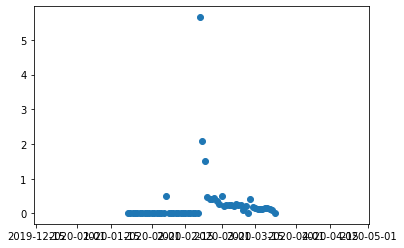

In [13]:
#Scatter plot to show individual days
plt.scatter(Italy_daily_df.reset_index()['index'],Italy_daily_df.reset_index()['Percent Change'])

# US Confirmed Cases

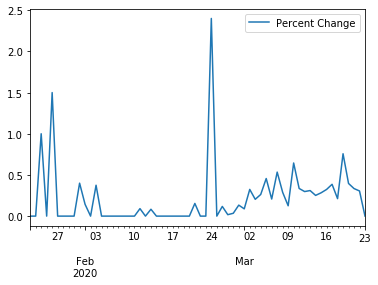

In [14]:
#Filter dataframes for country Italy
us_cond=time_series_2019_ncov_Confirmed['Country/Region']=='US'
us_confirmed = time_series_2019_ncov_Confirmed[us_cond]
us_confirmed =us_confirmed.drop(columns =['Lat','Long','Province/State'])
us_confirmed = us_confirmed.groupby('Country/Region').sum()

#Transpose dataframe
us_confirmed =us_confirmed.T
us_confirmed.index = pd.to_datetime(us_confirmed.index)
#us_confirmed.plot(legend=True,label = "Total Cases")

#Loop for daiyl change %
us_daily = [0]
us_daily_percent = [0]
for i in range(1,len(us_confirmed['US'])):
    us_daily.append(us_confirmed['US'][i]-us_confirmed['US'][i-1])
    if us_confirmed['US'][i-1]>0:
        us_daily_percent.append((us_confirmed['US'][i]-us_confirmed['US'][i-1])/us_confirmed['US'][i-1])
    else:
        us_daily_percent.append(0)
us_daily_df = us_confirmed[['US']]
us_daily_df['Daily']=us_daily
us_daily_df['Percent Change'] = us_daily_percent

#Plot daily change %
us_daily_df['Percent Change'].plot(legend=True)
plt.legend()
plt.show()

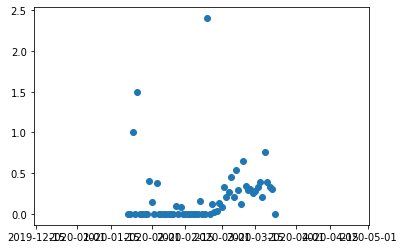

In [15]:
#Scatter plot to show individual days
plt.scatter(us_daily_df.reset_index()['index'],us_daily_df.reset_index()['Percent Change'])

# China Confirmed Cases

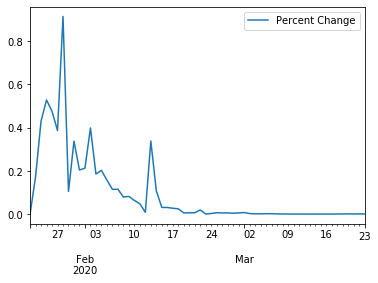

In [16]:
#Filter dataframe for country, China
china_cond=time_series_2019_ncov_Confirmed['Country/Region']=='China'
china_confirmed = time_series_2019_ncov_Confirmed[china_cond]
china_confirmed =china_confirmed.drop(columns =['Lat','Long','Province/State'])
china_confirmed = china_confirmed.groupby('Country/Region').sum()

#Transpose dataframe
china_confirmed =china_confirmed.T
china_confirmed.index = pd.to_datetime(china_confirmed.index)
#us_confirmed.plot(legend=True,label = "Total Cases")

#Loop to calculate daily change %
china_daily = [0]
china_daily_percent = [0]
for i in range(1,len(china_confirmed['China'])):
    china_daily.append(china_confirmed['China'][i]-china_confirmed['China'][i-1])
    if china_confirmed['China'][i-1]>0:
        china_daily_percent.append((china_confirmed['China'][i]-china_confirmed['China'][i-1])/china_confirmed['China'][i-1])
    else:
        china_daily_percent.append(0)
china_daily_df = china_confirmed[['China']]
china_daily_df['Daily']=china_daily
china_daily_df['Percent Change'] = china_daily_percent

#plot daily change %
china_daily_df['Percent Change'].plot(legend=True)
plt.legend()
plt.show()

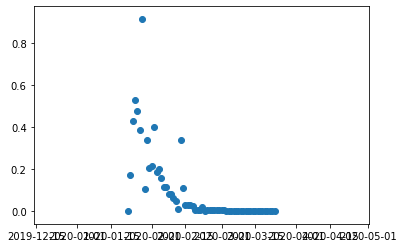

In [17]:
#Use scatter plot to show daily change on indiv days
plt.scatter(china_daily_df.reset_index()['index'],china_daily_df.reset_index()['Percent Change'])

# Data Visuals

# South Korea v COVID Cases

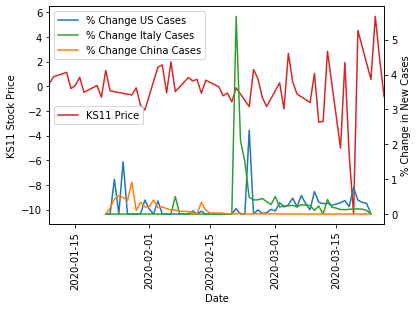

In [18]:
KS11fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('KS11 Stock Price')
ax1.plot(KS11_df['Date'],KS11_df['Change %'], label = "KS11 Price", color=color)
plt.xlim(datetime.date(2020,1,9),datetime.date(2020,3,26))
#plt.yscale('symlog')

plt.legend(loc='center left')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('% Change in New Cases')
ax2.plot(us_daily_df['Percent Change'], label = "% Change US Cases", color=color1)
ax2.plot(Italy_daily_df['Percent Change'], label = "% Change Italy Cases", color=color2)
ax2.plot(china_daily_df['Percent Change'], label = "% Change China Cases", color=color3)

plt.legend(loc = 'upper left')

plt.show()

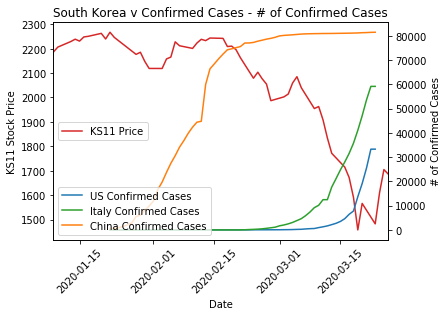

In [19]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('KS11 Stock Price')
ax1.plot(KS11_df['Date'],KS11_df['Close'], label = "KS11 Price", color=color)
plt.xlim(datetime.date(2020,1,9),datetime.date(2020,3,26))
#plt.yscale('symlog')

plt.legend(loc='center left')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('# of Confirmed Cases')
ax2.plot(us_confirmed['US'], label = "US Confirmed Cases", color=color1)
ax2.plot(Italy_confirmed['Italy'], label = "Italy Confirmed Cases", color=color2)
ax2.plot(china_confirmed['China'], label = "China Confirmed Cases", color=color3)

plt.title('South Korea v Confirmed Cases - # of Confirmed Cases')
plt.legend(loc = 'lower left')
plt.savefig("images/South Korea-Price and Cases.png")
plt.show()

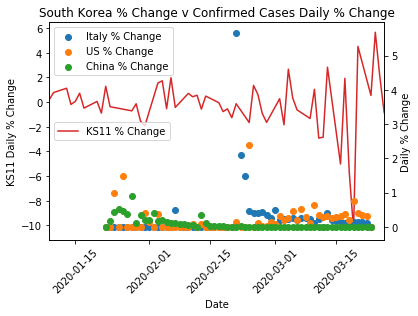

In [20]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('KS11 Daily % Change')
ax1.plot(KS11_df['Date'],KS11_df['Change %'], label = "KS11 % Change", color=color)
plt.xlim(datetime.date(2020,1,9),datetime.date(2020,3,26))

plt.legend(loc='center left')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('Daily % Change')
ax2.scatter(Italy_daily_df.reset_index()['index'],Italy_daily_df.reset_index()['Percent Change'],label='Italy % Change')
ax2.scatter(us_daily_df.reset_index()['index'],us_daily_df.reset_index()['Percent Change'], label='US % Change')
ax2.scatter(china_daily_df.reset_index()['index'],china_daily_df.reset_index()['Percent Change'],label='China % Change')

plt.title('South Korea % Change v Confirmed Cases Daily % Change')
plt.legend(loc = 'upper left')
plt.savefig("images/South Korea Price v Daily % Change.png")
plt.show()

# S&P 500 v COVID Cases

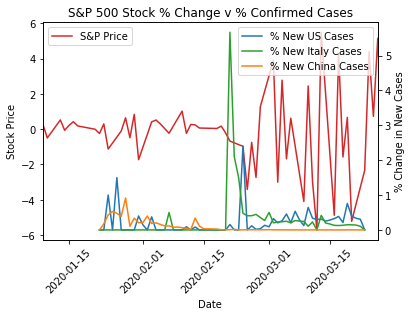

In [21]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.plot(snp_df['Date'],snp_df['Change %'], label = "S&P Price", color=color)
plt.xlim(datetime.date(2020,1,9),datetime.date(2020,3,26))
#plt.yscale('symlog')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('% Change in New Cases')
ax2.plot(us_daily_df['Percent Change'], label = "% New US Cases", color=color1)
ax2.plot(Italy_daily_df['Percent Change'], label = "% New Italy Cases", color=color2)
ax2.plot(china_daily_df['Percent Change'], label = "% New China Cases", color=color3)

plt.legend(loc = 'upper right')
plt.title('S&P 500 Stock % Change v % Confirmed Cases')
plt.savefig("images/S&P % Change v % Confirmed Cases.png")

plt.show()

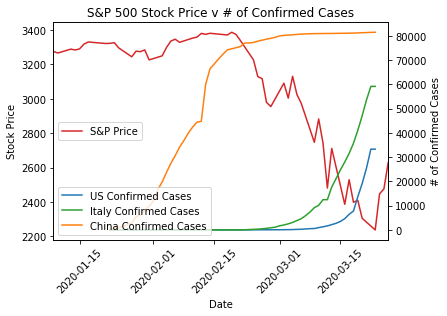

In [22]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.plot(snp_df['Date'],snp_df['Close'], label = "S&P Price", color=color)
plt.xlim(datetime.date(2020,1,9),datetime.date(2020,3,26))
#plt.yscale('symlog')

plt.legend(loc='center left')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('# of Confirmed Cases')
ax2.plot(us_confirmed['US'], label = "US Confirmed Cases", color=color1)
ax2.plot(Italy_confirmed['Italy'], label = "Italy Confirmed Cases", color=color2)
ax2.plot(china_confirmed['China'], label = "China Confirmed Cases", color=color3)

plt.legend(loc = 'lower left')
plt.title('S&P 500 Stock Price v # of Confirmed Cases')
plt.savefig("images/S&P Price v # of Confirmed Cases.png")
plt.show()


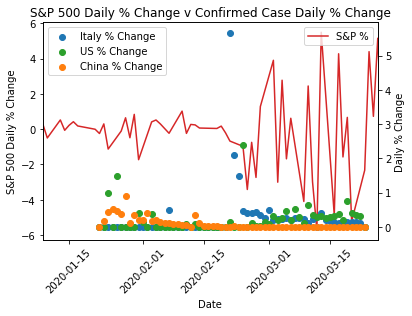

In [23]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Daily % Change')
ax1.plot(snp_df['Date'],snp_df['Change %'], label = "S&P %", color=color)
plt.xlim(datetime.date(2020,1,9),datetime.date(2020,3,26))

plt.legend(loc='upper right')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('Daily % Change')
ax2.scatter(Italy_daily_df.reset_index()['index'],Italy_daily_df.reset_index()['Percent Change'],label='Italy % Change', color=color1)
ax2.scatter(us_daily_df.reset_index()['index'],us_daily_df.reset_index()['Percent Change'], label='US % Change',color=color2)
ax2.scatter(china_daily_df.reset_index()['index'],china_daily_df.reset_index()['Percent Change'],label='China % Change',color=color3)

plt.legend(loc = 'upper left')
plt.title('S&P 500 Daily % Change v Confirmed Case Daily % Change')
plt.savefig("images/S&P Price v Daily % Change.png")
plt.show()

# Italy Markets v COVID Cases

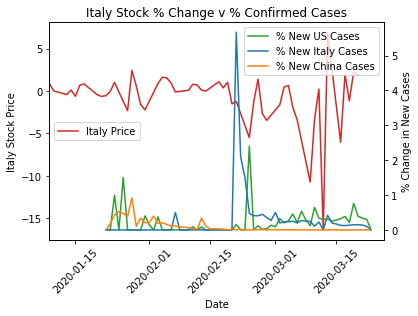

In [24]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Italy Stock Price')
ax1.plot(italy_df['Date'],italy_df['Change %'], label = "Italy Price", color=color)
plt.xlim(datetime.date(2020,1,9),datetime.date(2020,3,26))
#plt.yscale('symlog')

plt.legend(loc='center left')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('% Change in New Cases')
ax2.plot(us_daily_df['Percent Change'], label = "% New US Cases", color=color2)
ax2.plot(Italy_daily_df['Percent Change'], label = "% New Italy Cases", color=color1)
ax2.plot(china_daily_df['Percent Change'], label = "% New China Cases", color=color3)

plt.legend(loc = 'upper right')
plt.title('Italy Stock % Change v % Confirmed Cases')
plt.savefig("images/Italy % Change v % Confirmed Cases.png")
plt.show()

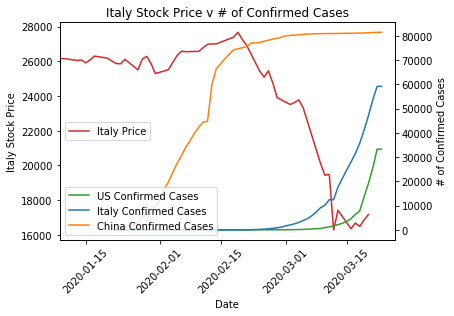

In [25]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Italy Stock Price')
ax1.plot(italy_df['Date'],italy_df['Price'], label = "Italy Price", color=color)
plt.xlim(datetime.date(2020,1,9),datetime.date(2020,3,26))
#plt.yscale('symlog')

plt.legend(loc='center left')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('# of Confirmed Cases')
ax2.plot(us_confirmed['US'], label = "US Confirmed Cases", color=color2)
ax2.plot(Italy_confirmed['Italy'], label = "Italy Confirmed Cases", color=color1)
ax2.plot(china_confirmed['China'], label = "China Confirmed Cases", color=color3)

plt.legend(loc = 'lower left')
plt.title('Italy Stock Price v # of Confirmed Cases')
plt.savefig("images/Italy Price v # of Confirmed Cases.png")
plt.show()

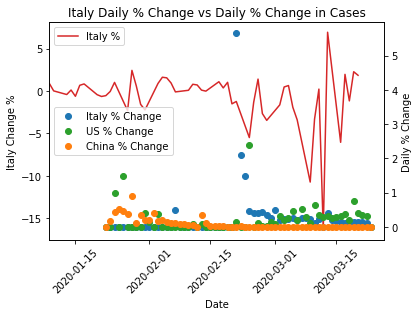

In [26]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Italy Change %')
ax1.plot(italy_df['Date'],italy_df['Change %'], label = "Italy %", color=color)
plt.xlim(datetime.date(2020,1,9),datetime.date(2020,3,26))

plt.legend(loc='upper left')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('Daily % Change')
ax2.scatter(Italy_daily_df.reset_index()['index'],Italy_daily_df.reset_index()['Percent Change'],label='Italy % Change', color=color1)
ax2.scatter(us_daily_df.reset_index()['index'],us_daily_df.reset_index()['Percent Change'], label='US % Change', color=color2)
ax2.scatter(china_daily_df.reset_index()['index'],china_daily_df.reset_index()['Percent Change'],label='China % Change',color=color3)

plt.legend(loc = 'center left')
plt.title("Italy Stock Price vs ")
plt.title("Italy Daily % Change vs Daily % Change in Cases")
plt.savefig("images/Italy-Price and % Change.png")
plt.show()

# ARIMA MODEL

First attempt at time series forecasting. Challenge with doing so at this time is majority of stock data does not contain the impact of an event like this and there have been no events like this in recent time.

p-value: 9.588378812026494e-07


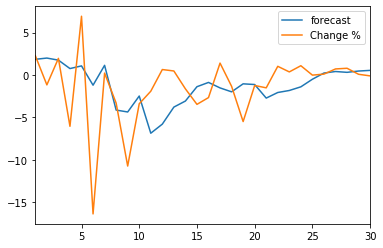

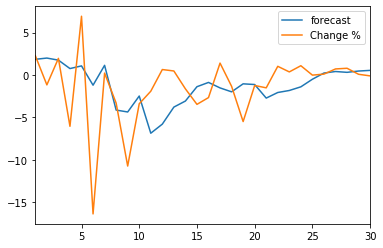

In [27]:
timeseries1=italy_df['Change %']
print("p-value:",adfuller(timeseries1.dropna())[1])

#p-value < 0.05 indicates non-stationary data
model=ARIMA(timeseries1,order=(5,1,0))
results=model.fit()
results.plot_predict(1,30)

p-value: 3.0471307945093058e-06


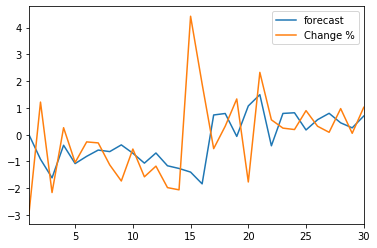

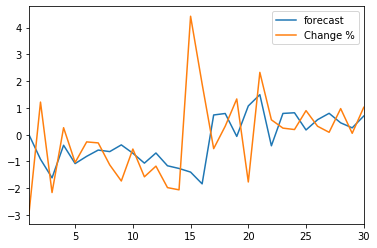

In [28]:
timeseries2=snp_df['Change %']
print("p-value:",adfuller(timeseries2.dropna())[1])

#p-value < 0.05 indicates non-stationary data
model=ARIMA(timeseries2,order=(5,1,0))
results=model.fit()
results.plot_predict(1,30)

p-value: 3.0471307945093058e-06


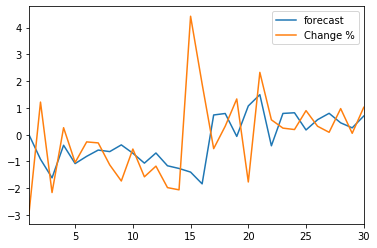

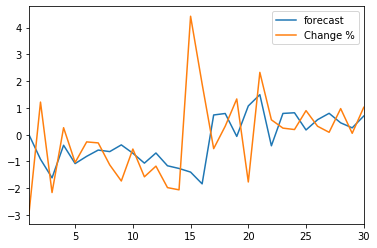

In [30]:
timeseries3=snp_df['Change %']
print("p-value:",adfuller(timeseries3.dropna())[1])

#p-value < 0.05 indicates non-stationary data
model=ARIMA(timeseries3,order=(5,1,0))
results=model.fit()
results.plot_predict(1,30)